In [1]:
%matplotlib widget
import matplotlib.pyplot as plt

###  Reading RH 1.5D output

This notebook presents some basic commands to analyse the output of [RH 1.5D](https://github.com/ITA-Solar/rh).

You should have run RH 1.5D before and have the three output files in your current directory:
* output_ray.hdf5
* output_indata.hdf5
* output_aux.hdf5

We'll start by importing the [helita.sim.rh15d](https://github.com/ITA-Solar/helita/blob/master/helita/sim/rh15d.py) module that has the interface to RH 1.5D:

In [2]:
from helita.sim import rh15d

And load the output into a structure we'll call `data`:

In [3]:
data = rh15d.Rh15dout()

--- Read ./output_aux.hdf5 file.
--- Read ./output_indata.hdf5 file.
--- Read ./output_ray.hdf5 file.


/Users/tiago/codes/helita/helita/sim/rh15d.py:40: FutureWarning: The autoclose argument is no longer used by xarray.open_dataset() and is now ignored; it will be removed in a future version of xarray. If necessary, you can control the maximum number of simultaneous open files with xarray.set_options(file_cache_maxsize=...).
  setattr(self, g, xr.open_dataset(infile, group=g, autoclose=True))
/Users/tiago/codes/helita/helita/sim/rh15d.py:53: FutureWarning: The autoclose argument is no longer used by xarray.open_dataset() and is now ignored; it will be removed in a future version of xarray. If necessary, you can control the maximum number of simultaneous open files with xarray.set_options(file_cache_maxsize=...).
  self.ray = xr.open_dataset(infile, autoclose=True)


We can now do a quick plot of the intensity:

(278.7, 280.7, 0.0, 2e-09)

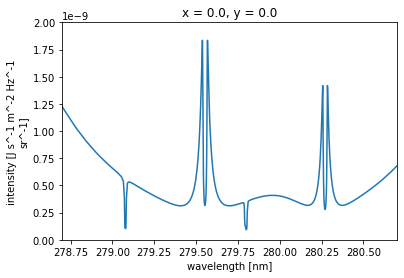

In [4]:
data.ray.intensity.plot()
plt.axis([278.7, 280.7, 0, 2e-9])

The object ``data`` contains a variety of datasets that were written by RH 1.5D. The actual arrays saved depend on the options used when running the code. The output variables and file structure is explained in the [RH 1.5D documentation](https://rh15d.readthedocs.io/en/latest/output.html#output-file-structure). Generally, the Python routines load the following datasets:

* ``data.ray``: intensity, wavelength, other radiative transfer quantities
* ``data.atom_MG``: one of per active atom (e.g. ``data.atom_CA`` for Ca), can contain level populations and radiative rates
* ``data.atmos``: parts of input atmosphere (temperature, velocity, etc.)
* ``data.mpi``: information on convergence, and how each column was run
* ``data.input``: contains some of the input options used

For example, to plot the temperature vs. height in Mm for the first column we do:

(4000.0, 10000.0)

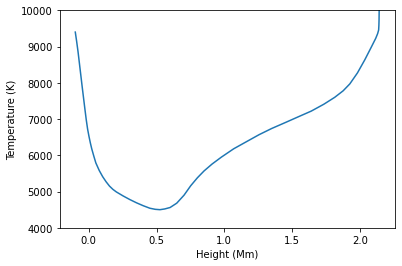

In [5]:
plt.figure()
plt.plot(data.atmos.height_scale[0, 0] / 1e6, data.atmos.temperature[0, 0])
plt.xlabel("Height (Mm)")
plt.ylabel("Temperature (K)")
plt.ylim(4000, 10000)

And to plot the departure coefficients for the first three levels of Mg II, we can do:

(0.05, 2.0)

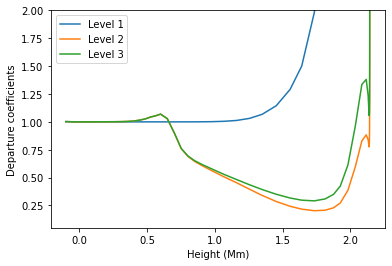

In [6]:
plt.figure()
for i in range(3):
    plt.plot(data.atmos.height_scale[0,0]/1e6, 
             data.atom_MG.populations[i, 0, 0]/data.atom_MG.populations_LTE[i, 0, 0],
             label='Level %i' % (i + 1))
plt.legend(loc="upper left")
plt.xlabel("Height (Mm)")
plt.ylabel("Departure coefficients")
plt.ylim(0.05, 2)

You can now explore different variables from the RH 1.5D output.